# Trafic Sign Recognition

### Introduction

Self driven cars have gained a lot of attention with the developpement of the Artificial Intelligence. However, a lot of domains are cosidered when we talk about these topic. 

We will consider only the study of trafic signal starting with the detection then the recognition of those signal using deep learning and python.

The data we will use in these project is available in Kaggle  [Trafic Signal](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

### Installing the required Library

In [1]:
%pip install tensorflow keras sklearn matplotlib pandas pil

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


### Data Exploration

The data available is divided into training and testing data .The testing data is grouped into 43 classes ,each class represent the type of the trafic signal.

#### Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [3]:
cur_path=os.getcwd()
print(cur_path)

c:\Users\hafsa\OneDrive\Documents\GitHub\TraficSignRecognition-CNN-and-Keras-


In [4]:
data=[]
labels=[]
classes=43 
cur_path=os.getcwd()
print(cur_path)
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    
    images=os.listdir(path)
    for a in images :
        try:
            image = Image.open(path + '\\'+ a)
            
            image=image.resize((30,30))
            
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except:
            print("Error Loading image",i)
            
data=np.array(data)
labels=np.array(labels)

c:\Users\hafsa\OneDrive\Documents\GitHub\TraficSignRecognition-CNN-and-Keras-


In [5]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


The shape of our data is () where the is the number of images in the data ,the (30,30) is the size of the images and the 3 stand for the RGB values of each pixels of the image.

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train,y_test)

(31367, 30, 30, 3) (7842, 30, 30, 3) [36 28  2 ... 39  1 10] [26 15 13 ...  8  7 20]


Convert the lables into one Hot encoder

In [7]:
y_train , y_test=to_categorical(y_train,43),to_categorical(y_test,43)


### CNN model 

#### The Architecture of the Model

* Conv2D layer with 32 filters and a kernel size of 5x5: The purpose of this layer is to perform convolutional filtering on the input image. The layer has 32 filters, which means that it will output 32 feature maps for each input image. The filters are applied to a 5x5 patch of the input image at a time, sliding across the image to produce a 2D output feature map. The ReLU activation function is applied to the output of this layer, which introduces non-linearity into the model.

* Conv2D layer with 32 filters and a kernel size of 5x5: This layer is similar to the first Conv2D layer, with 32 filters and a 5x5 kernel size. The purpose of this layer is to learn additional, more complex features from the input image.

* MaxPool2D layer with a pool size of 2x2: The purpose of this layer is to downsample the feature maps produced by the previous layers. The pooling operation takes the maximum value in each 2x2 patch of the feature map and outputs a single value, resulting in a smaller output feature map with reduced dimensionality.

* Dropout layer with a rate of 0.25: This layer applies dropout regularization to the input data. During training, a fraction of the input units (in this case, 25%) are randomly set to 0 at each update. This helps prevent overfitting by forcing the model to learn redundant representations of the input data.

* Conv2D layer with 64 filters and a kernel size of 3x3: This layer performs another convolutional filtering operation on the input feature maps, with 64 filters and a smaller 3x3 kernel size. This layer is designed to learn more complex, high-level features from the input data.

* Conv2D layer with 64 filters and a kernel size of 3x3: This layer is similar to the previous Conv2D layer, with 64 filters and a 3x3 kernel size. This layer further refines the learned features from the previous layer.

* MaxPool2D layer with a pool size of 2x2: This layer applies max pooling to the output feature maps from the previous layers, reducing the dimensionality of the feature maps further.

* Dropout layer with a rate of 0.25: This is another dropout layer that applies regularization to the input data, randomly setting 25% of the input units to 0 during training.

* Flatten layer: This layer converts the 2D output feature maps from the previous layer into a 1D feature vector. This allows the output to be fed into a densely connected neural network.

* Dense layer with 256 units and a ReLU activation function: This layer is a fully connected layer that applies a linear transformation to the input data. The layer has 256 units, and the ReLU activation function is applied to the output of this layer.

* Dropout layer with a rate of 0.5: This is another dropout layer that applies regularization to the input data, randomly setting 50% of the input units to 0 during training.

* Dense layer with 43 units and a softmax activation function: This is the final output layer of the model. It has 43 units (one for each class in the dataset), and the softmax activation function is applied to the output of this layer to produce a probability distribution over the classes. The class with the highest probability is the predicted class for the input image

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Training and Validation


In [9]:
epochs = 15
anc = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 35s 35ms/step - loss: 3.5979 - accuracy: 0.0523 - val_loss: 3.4826 - val_accuracy: 0.0632
Epoch 2/15
981/981 [==============================] - 36s 37ms/step - loss: 3.4998 - accuracy: 0.0531 - val_loss: 3.4809 - val_accuracy: 0.0632
Epoch 3/15
981/981 [==============================] - 36s 36ms/step - loss: 3.4955 - accuracy: 0.0562 - val_loss: 3.4812 - val_accuracy: 0.0576
Epoch 4/15
981/981 [==============================] - 34s 34ms/step - loss: 3.4956 - accuracy: 0.0538 - val_loss: 3.4806 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 33s 34ms/step - loss: 3.4935 - accuracy: 0.0558 - val_loss: 3.4792 - val_accuracy: 0.0574
Epoch 6/15
981/981 [==============================] - 38s 38ms/step - loss: 3.4936 - accuracy: 0.0557 - val_loss: 3.4782 - val_accuracy: 0.0632
Epoch 7/15
981/981 [==============================] - 40s 40ms/step - loss: 3.4931 - accuracy: 0.0520 - val_loss: 3.4792 - val_accuracy:

In [11]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Visualize the network architecture
from keras.models import load_model
model = load_model('my_model.h5')
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


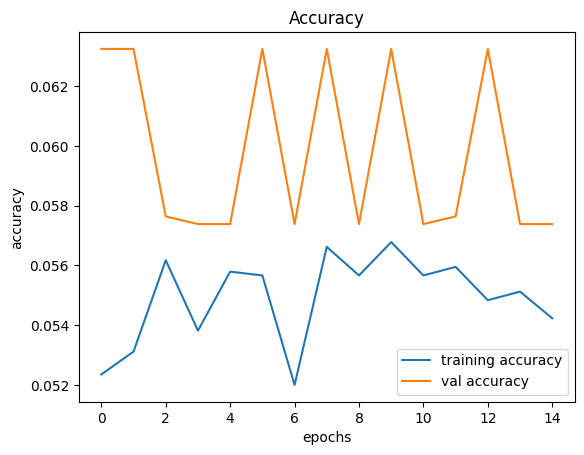

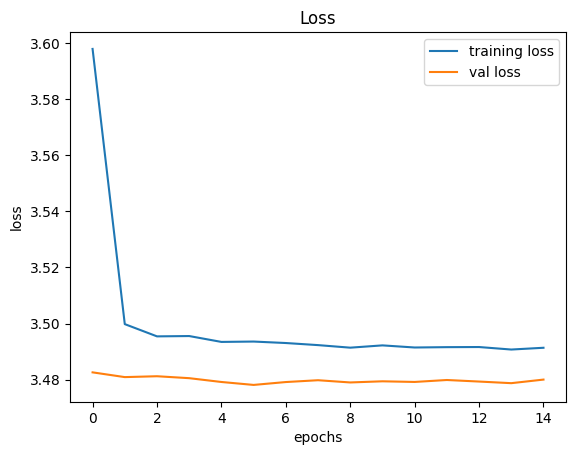

In [ ]:
#plotting graphs for accuracy

model.save("my_model.h5")
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(X_test,y_test)

246/246 [==============================] - 2s 9ms/step - loss: 3.4801 - accuracy: 0.0574
